# Shapes
Images of shapes used to test digital image processing functions. 
In Python an image is usually represented as a two-dimensional array so in order to build an image of a geometric shape we have to compute the coordinates x and y of the shape as integer values for the rows and columns of the pixels and give to those points a value, e.g. 0 for black and 255 for white. This notebook contains the functions for lines and circles. Being images two-dimensional arrays, images of lines and circles can be added multiple times to one image if the size of all the images are the same.

In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

## Line
The reference system used is with the origin at the upper left corner of the image. The horizontal axes v represent the columns
and the vertical axes u, from the origin down to the bottom of the image, represents the rows. A point is denoted by its coordinates (u, v).

In [26]:
def dip_line(u1, v1, u2, v2, M, N):
    delta_u = u1 - u2
    delta_v = v1 - v2
    num_pixels = 100 * np.rint(np.sqrt( delta_u * delta_u + delta_v * delta_v )).astype(int)
    return dip_linePoints(u1, v1, u2, v2, M, N, num_pixels)

In [27]:
def dip_linePoints(u1, v1, u2, v2, M, N, num_pixels):
    '''
    Creates an MxN image of a line segment given its two endpoints (u1, v1) and (u2, v2)
    1) Computes the value of the slope and intercept
    2) Computes the value of the segment's u and v as integer variables
    3) Creates a 2-dimensional array of points (u, v) of the line
    4) Creates a two-dimensional array of the image
    5) Adds the points to the empty image
    6) Returns the image
    '''
    U = np.linspace(u1, u2, num_pixels)
    V = np.linspace(v1, v2, num_pixels)
    slope = 0.0
    
    if v1 != v2:
        slope = (u2 - u1) / (v2 - v1)
        intercept = u2 - slope * v2
        U = slope * V + intercept
    
    U = np.rint(U).astype(int) # row index of the line's pixels in the image two-dimensional array
    V = np.rint(V).astype(int) # column index of the line's pixels in the image two dimensional array

    image = np.zeros((M, N), dtype='int') 
    for i in range(0, V.shape[0]):
        row = U[i]
        col = V[i]
        image[row, col] = 255
    
    return image

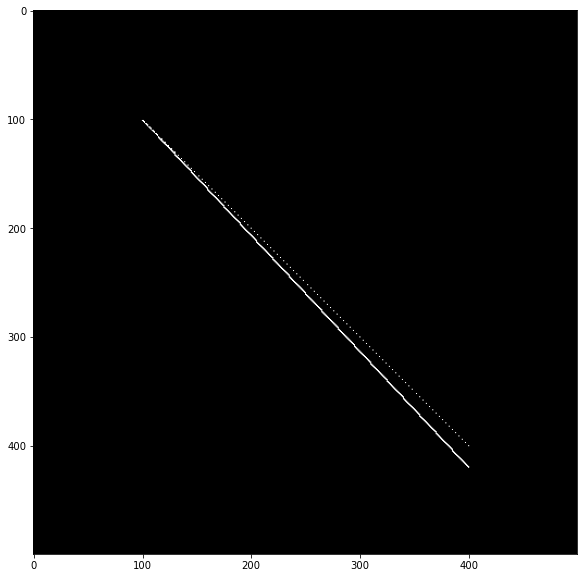

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
M = 500
N = 500
line1 = dip_linePoints(100, 100, 400, 400, M, N, 100)
line2 = dip_line(100, 100, 420, 400, M, N)
lines = ((line1 + line2) == 255) * 255
ax.imshow(lines, cmap=cm.gray)

## Circle

In [8]:
def dip_circle(a, b, r, M, N, num_pixels):
    '''
    Creates an MxN image of a circular shape given its center (a,b) and radius r.
    a, b and r are given in number of pixels.
    1) Computes the value of the x and y as integer variables
    2) Creates a 2-dimensional array of points (x, y) of the circle
    3) Creates a two-dimensional array of the image
    4) Adds the points to the empty image
    5) Returns the image
    '''
    # num_pixels = max(r, 360) 
    theta = np.linspace(-np.pi, np.pi, num_pixels)

    X = a + r * np.cos(theta)
    Y = b + r * np.sin(theta)
    X = np.rint(X).astype(int) # row index of the circle's pixels in the image two-dimensional array
    Y = np.rint(Y).astype(int) # column index of the circle's pixels in the image two dimensional array
    
    image = np.zeros((M, N))
    for i in range(0, X.shape[0]):
        row = Y[i]
        col = X[i]
        image[row, col] = 255
    return image

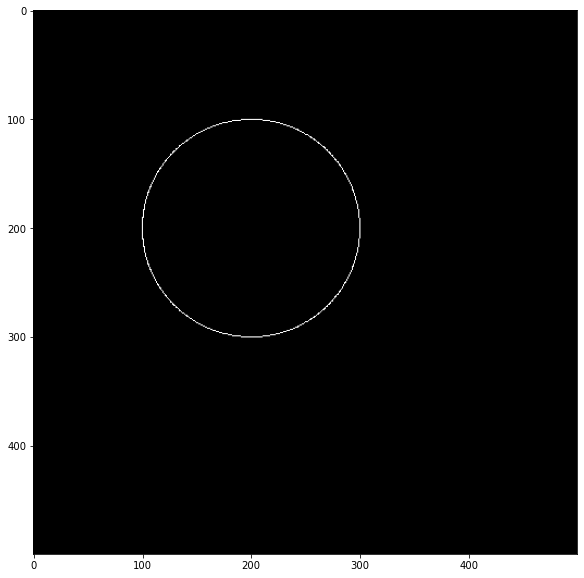

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
circle = dip_circle(200, 200, 100, 500, 500, 720)
ax.imshow(circle, cmap=cm.gray)

In [2]:
plt.close('all')